## Data Preprocessing:

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('full.csv')
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [136]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [137]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [138]:
df.shape

(41188, 21)

In [139]:
# Changing y variable to the name subscribed and making it binary data

# renaming the column name to subscribed
df = df.rename(columns = {'y': 'subscribed'})

# changing the strings to 1's and 0's
df['subscribed'] = df['subscribed'].map({'yes': 1, 'no': 0})

In [140]:
df.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,NaN
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000


In [141]:
# Convert the 'month' column to a categorical data type with the correct order for future graphs
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

In [142]:
df.duplicated().sum()
df.loc[df.duplicated(),:]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0


In [143]:
df = df.drop_duplicates()

In [144]:
# Checking if the social and economic context metrics have any outliers
# Define the columns corresponding to the metrics of interest
metrics_columns = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Loop through each metric and calculate the IQR and identify outliers
for metric in metrics_columns:
    # Calculate the IQR for the current metric
    q1 = df[metric].quantile(0.25)
    q3 = df[metric].quantile(0.75)
    iqr = q3 - q1
    
    # Define the lower bound and upper bound
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers for the current metric
    outliers = df[(df[metric] < lower_bound) | (df[metric] > upper_bound)]
    
    # Print the results
    print(f"Metric: {metric}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of Outliers: {len(outliers)}")
    print("Outliers:")
    print(outliers)
    print("\n")

Metric: emp.var.rate
IQR: 3.2
Lower Bound: -6.6000000000000005
Upper Bound: 6.200000000000001
Number of Outliers: 0
Outliers:
Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, subscribed]
Index: []

[0 rows x 21 columns]


Metric: cons.price.idx
IQR: 0.9189999999999969
Lower Bound: 91.69650000000001
Upper Bound: 95.3725
Number of Outliers: 0
Outliers:
Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, subscribed]
Index: []

[0 rows x 21 columns]


Metric: cons.conf.idx
IQR: 6.300000000000004
Lower Bound: -52.150000000000006
Upper Bound: -26.949999999999992
Number of Outliers: 446
Outliers:
       age         job   marital          education de

In [145]:
# Dropping outliers in consumer confidence index

# Define the lower and upper bounds
lower_bound = -52.15
upper_bound = -26.95

# Filter the DataFrame to keep only the rows within the bounds for 'cons.conf.idx'
df = df[(df['cons.conf.idx'] >= lower_bound) & (df['cons.conf.idx'] <= upper_bound)]

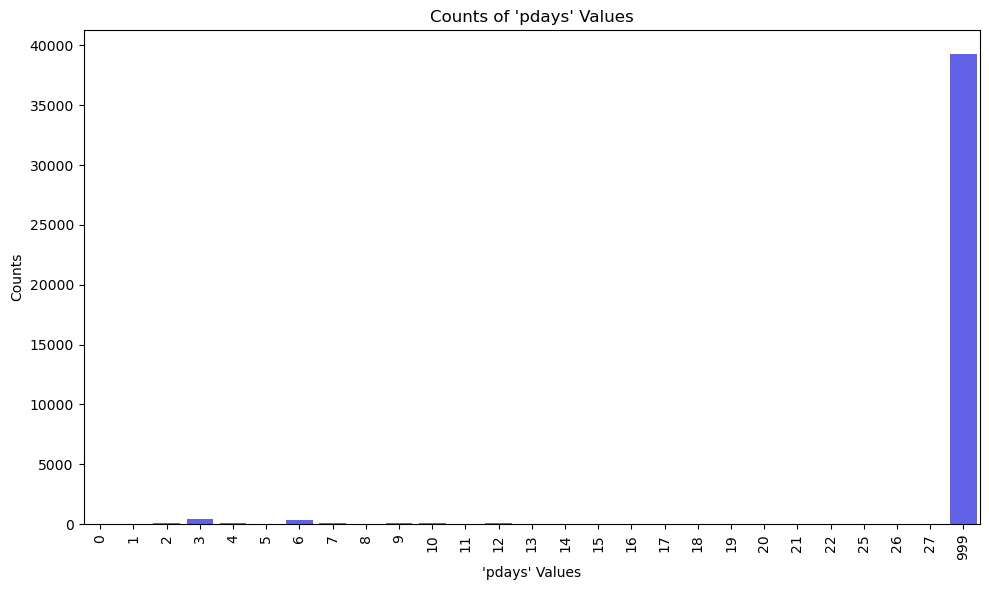

In [146]:
# Count the occurrences of each unique value of 'pdays'
# Want to get a better idea of the distribution and how many people were not previously contacted
pdays_counts = df['pdays'].value_counts()

# Sort the counts by 'pdays' values (to maintain the order of values)
pdays_counts = pdays_counts.sort_index()

# Plot the counts of each 'pdays' value
plt.figure(figsize=(10, 6))
sns.barplot(x=pdays_counts.index, y=pdays_counts.values, color='b', alpha=0.7)
plt.title("Counts of 'pdays' Values")
plt.xlabel("'pdays' Values")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

In [147]:
# insert new binary variable for pdays and drop current variable

# Create the 'prev_contacted' variable
df['prev_contacted'] = df['pdays'].apply(lambda x: 1 if x < 999 else 0)

# Drop the original 'pdays' column
df.drop(columns=['pdays'], inplace=True)

In [366]:
df.shape

(40730, 21)

## Data Exploration:

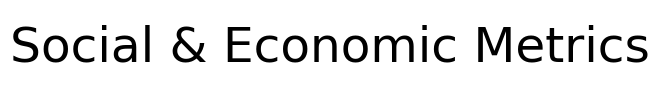

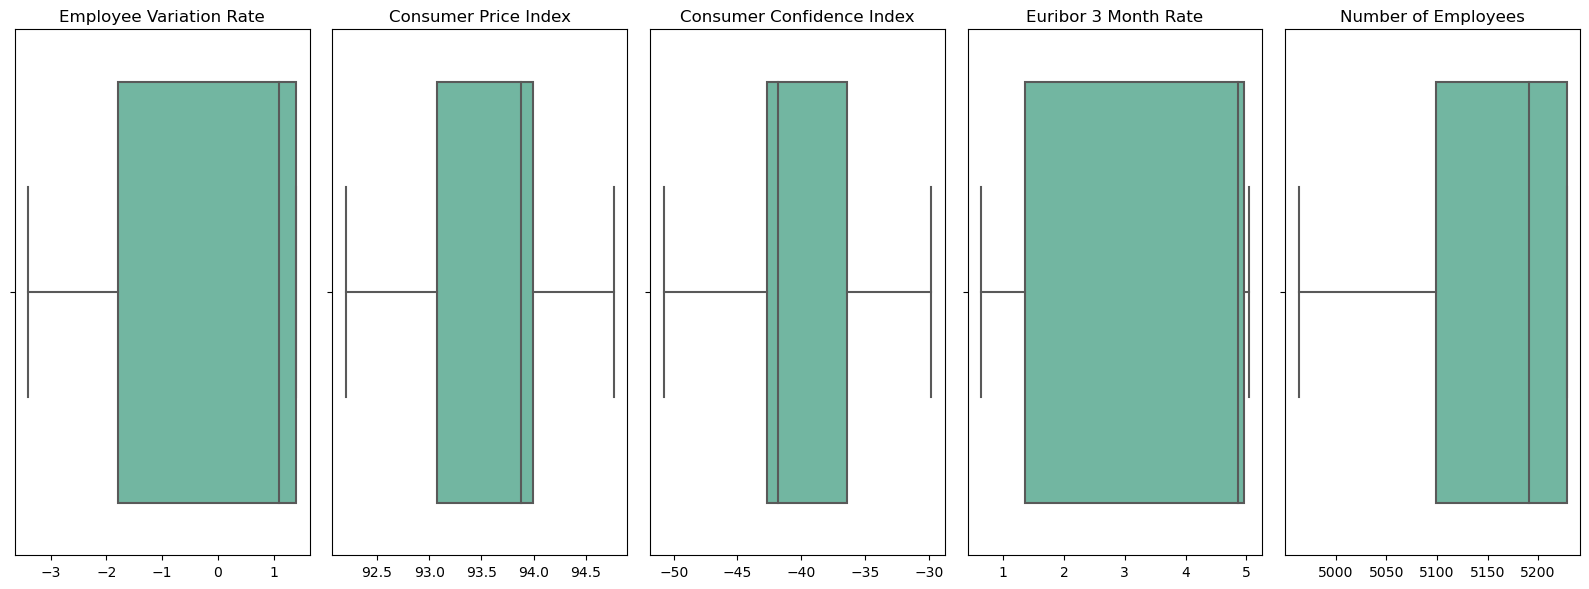

In [17]:
# Boxplots of all the social and economic context metrics

# Add a common header for all histograms
plt.figure(figsize=(2, 1))
plt.text(0.5, 0.5, "Social & Economic Metrics", 
         ha='center', va='center', fontsize=35)
plt.axis('off')  # Hide axis in the header plot

# Define the corresponding meaningful titles for the box plots
metrics_titles = {
    'emp.var.rate': 'Employee Variation Rate',
    'cons.price.idx': 'Consumer Price Index',
    'cons.conf.idx': 'Consumer Confidence Index',
    'euribor3m': 'Euribor 3 Month Rate',
    'nr.employed': 'Number of Employees'
}

# Create subplots to plot box plots for each metric
fig, axs = plt.subplots(nrows=1, ncols=len(metrics_columns), figsize=(16, 6))

# Loop through each metric and create the box plot
for i, metric in enumerate(metrics_columns):
    sns.boxplot(x=metric, data=df, ax=axs[i], palette='Set2')
    axs[i].set_title(metrics_titles[metric])
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    
# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plots
plt.show()

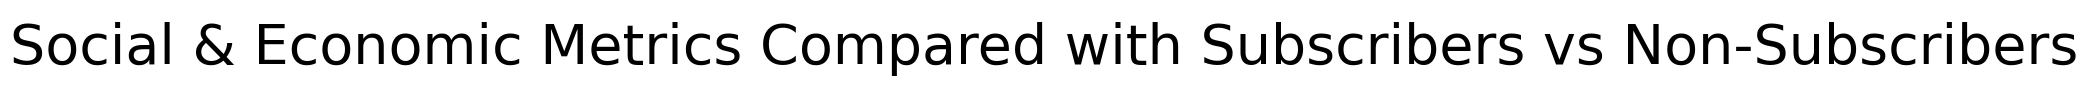

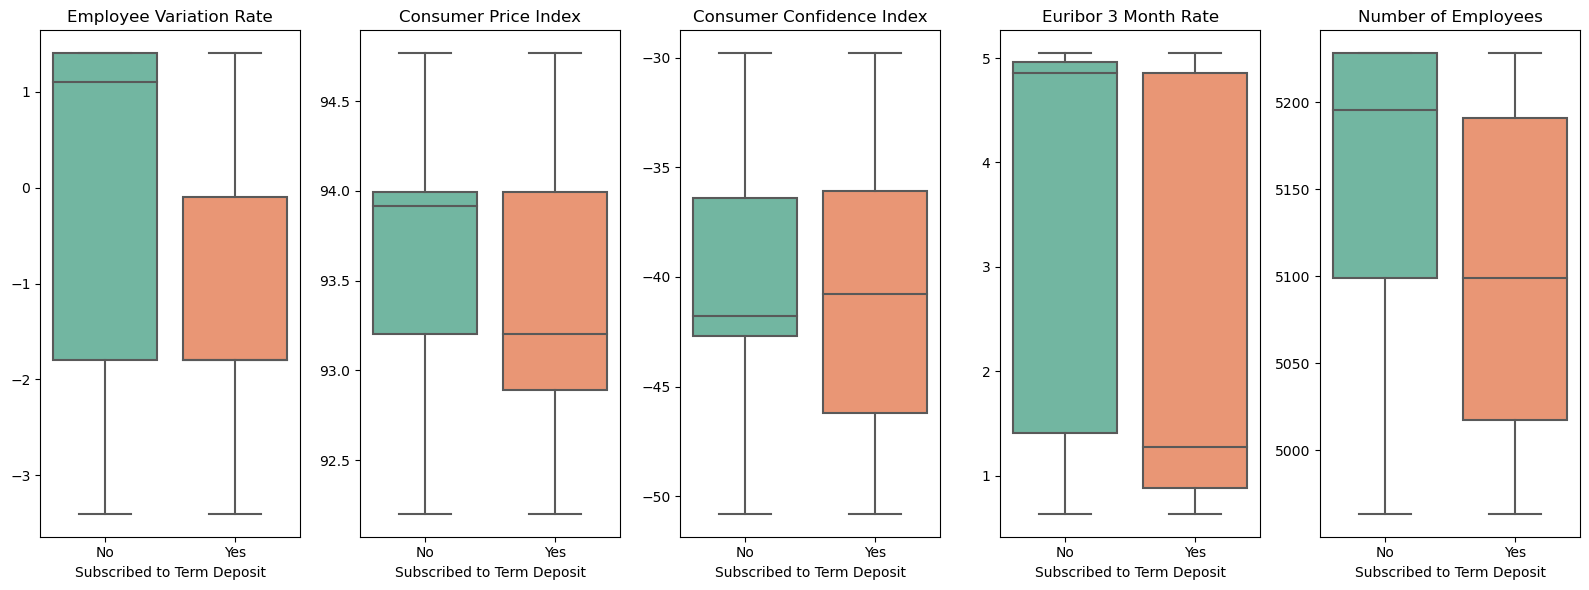

In [18]:
# Visualizing the results

# Add a common header for all histograms
plt.figure(figsize=(2, 1))
plt.text(0.5, 0.5, "Social & Economic Metrics Compared with Subscribers vs Non-Subscribers", 
         ha='center', va='center', fontsize=40)
plt.axis('off')  # Hide axis in the header plot

# Define the corresponding meaningful titles for the box plots
metrics_titles = {
    'emp.var.rate': 'Employee Variation Rate',
    'cons.price.idx': 'Consumer Price Index',
    'cons.conf.idx': 'Consumer Confidence Index',
    'euribor3m': 'Euribor 3 Month Rate',
    'nr.employed': 'Number of Employees'
}

# Create subplots to plot box plots for each metric
fig, axs = plt.subplots(nrows=1, ncols=len(metrics_columns), figsize=(16, 6))

# Loop through each metric and create the box plot
for i, metric in enumerate(metrics_columns):
    sns.boxplot(x='subscribed', y=metric, data=df, ax=axs[i], palette='Set2')
    axs[i].set_title(metrics_titles[metric])
    axs[i].set_xlabel('Subscribed to Term Deposit')
    axs[i].set_ylabel('')
    axs[i].set_xticklabels(['No', 'Yes'])  # Update x-axis labels to be 'No' and 'Yes'

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plots
plt.show()

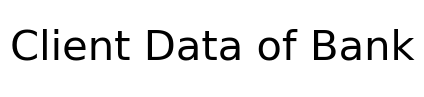

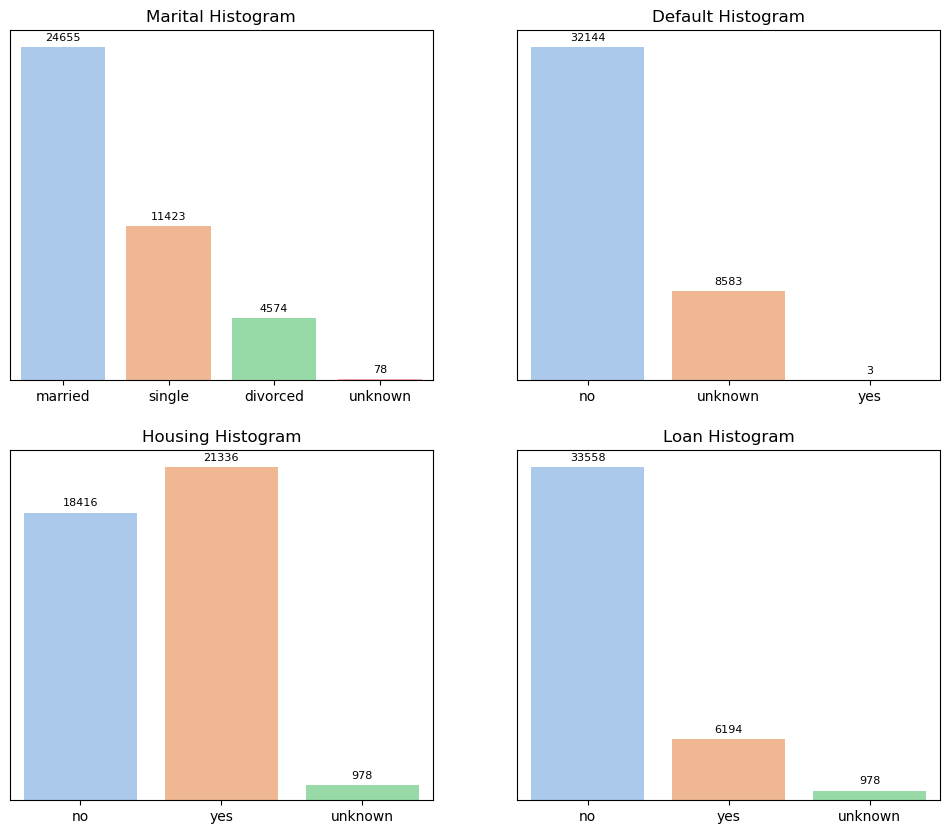

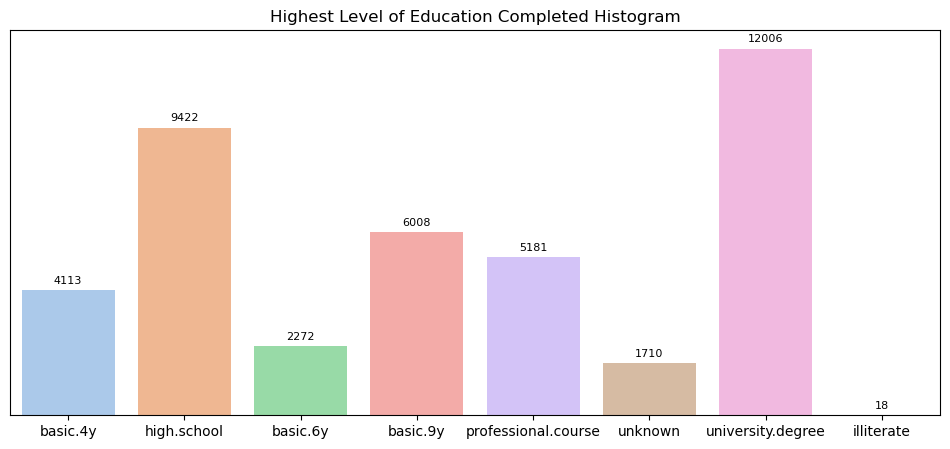

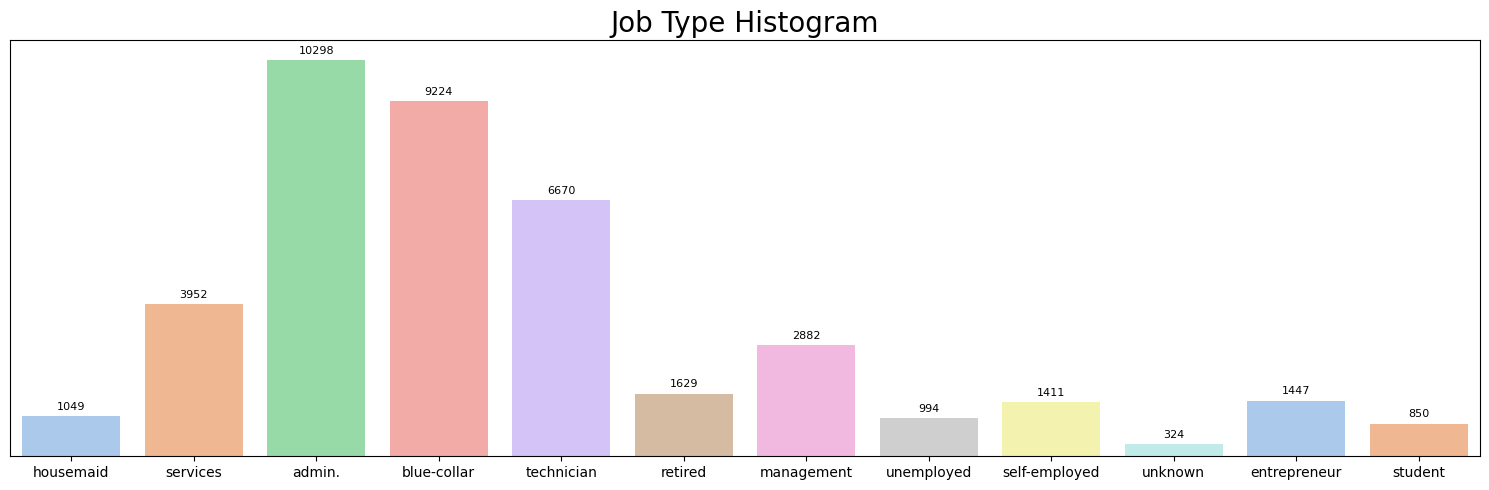

In [19]:
# Visualizing bank client data

# Add a common header for all histograms
plt.figure(figsize=(2, 1))
plt.text(0.5, 0.5, "Client Data of Bank", ha='center', va='center', fontsize=30)
plt.axis('off')  # Hide axis in the header plot

# Define the columns corresponding to the categorical variables
client_data_columns = ['marital', 'default', 'housing', 'loan']

# Create subplots to plot histograms for each categorical variable (except education and job)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axs array for easier iteration
axs = axs.ravel()

# Loop through each categorical variable (except education and job) and create the histogram
for i, categorical_var in enumerate(client_data_columns):
    sns.countplot(x=categorical_var, data=df, ax=axs[i], palette='pastel')
    axs[i].set_title(f"{categorical_var.capitalize()} Histogram")
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].set_yticks([])  # Remove y-axis labels

    # Set y-axis tick labels with the number of observations
    for p in axs[i].patches:
        height = p.get_height()
        axs[i].annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                        textcoords='offset points', ha='center', va='bottom', fontsize=8)  # Adjust fontsize

# Remove any empty subplots, if applicable
if len(client_data_columns) < len(axs):
    for j in range(len(client_data_columns), len(axs)):
        fig.delaxes(axs[j])

# Create a new subplot to plot the histogram for 'education'
plt.figure(figsize=(12, 5))
sns.countplot(x='education', data=df, palette='pastel')
plt.title("Highest Level of Education Completed Histogram")
plt.xlabel('')
plt.ylabel('')
plt.yticks([])  # Remove y-axis labels

# Set y-axis tick labels with the number of observations for 'education'
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                       textcoords='offset points', ha='center', va='bottom', fontsize=8)  # Adjust fontsize

# Create a new subplot to plot the histogram for 'job'
plt.figure(figsize=(15, 5))
sns.countplot(x='job', data=df, palette='pastel')
plt.title("Job Type Histogram", fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])  # Remove y-axis labels

# Set y-axis tick labels with the number of observations for 'job'
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                       textcoords='offset points', ha='center', va='bottom', fontsize=8)  # Adjust fontsize

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plots
plt.show()

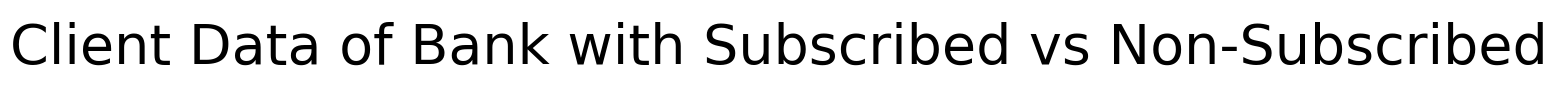

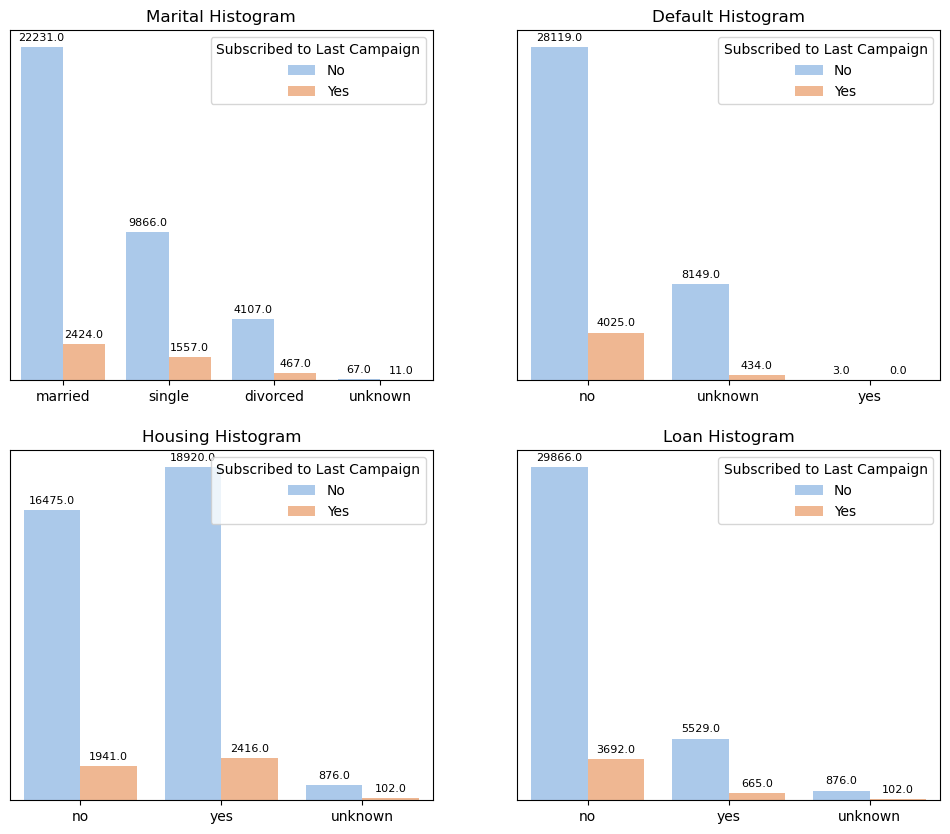

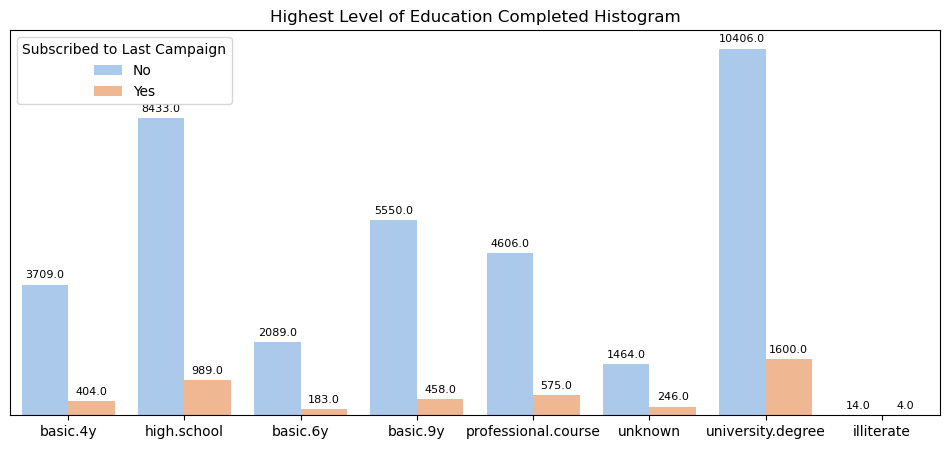

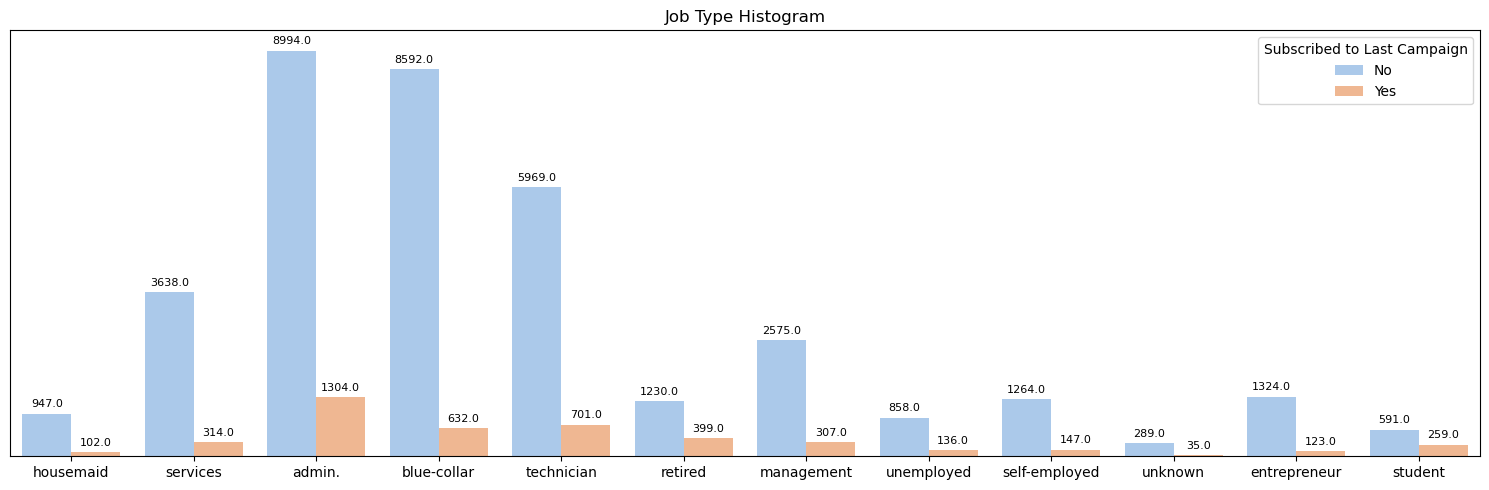

In [20]:
# Now taking into account subscribed vs non-subscribed

# Add a common header for all histograms
plt.figure(figsize=(2, 1))
plt.text(0.5, 0.5, "Client Data of Bank with Subscribed vs Non-Subscribed", ha='center', va='center', fontsize=40)
plt.axis('off')  # Hide axis in the header plot

# Define the columns corresponding to the categorical variables
client_data_columns = ['marital', 'default', 'housing', 'loan']

# Create subplots to plot histograms for each categorical variable (except education and job)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axs array for easier iteration
axs = axs.ravel()

# Loop through each categorical variable (except education and job) and create the histogram
for i, categorical_var in enumerate(client_data_columns):
    sns.countplot(x=categorical_var, data=df, hue='subscribed', ax=axs[i], palette='pastel')
    axs[i].set_title(f"{categorical_var.capitalize()} Histogram")
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].set_yticks([])  # Remove y-axis labels
    axs[i].legend(title="Subscribed to Last Campaign", labels=['No', 'Yes'])

    # Set y-axis tick labels with the number of observations
    for p in axs[i].patches:
        height = p.get_height()
        axs[i].annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                        textcoords='offset points', ha='center', va='bottom', fontsize=8)  # Adjust fontsize

# Remove any empty subplots, if applicable
if len(client_data_columns) < len(axs):
    for j in range(len(client_data_columns), len(axs)):
        fig.delaxes(axs[j])

# Create a new subplot to plot the histogram for 'education'
plt.figure(figsize=(12, 5))
sns.countplot(x='education', data=df, hue='subscribed', palette='pastel')
plt.title("Highest Level of Education Completed Histogram")
plt.xlabel('')
plt.ylabel('')
plt.yticks([])  # Remove y-axis labels
plt.legend(title="Subscribed to Last Campaign", labels=['No', 'Yes'])

# Set y-axis tick labels with the number of observations for 'education'
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                       textcoords='offset points', ha='center', va='bottom', fontsize=8)  # Adjust fontsize

# Create a new subplot to plot the histogram for 'job'
plt.figure(figsize=(15, 5))
sns.countplot(x='job', data=df, hue='subscribed', palette='pastel')
plt.title("Job Type Histogram")
plt.xlabel('')
plt.ylabel('')
plt.yticks([])  # Remove y-axis labels
plt.legend(title="Subscribed to Last Campaign", labels=['No', 'Yes'])

# Set y-axis tick labels with the number of observations for 'job'
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                       textcoords='offset points', ha='center', va='bottom', fontsize=8)  # Adjust fontsize

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plots
plt.show()


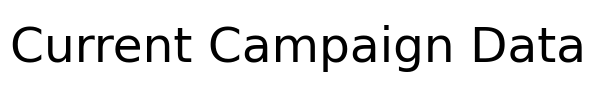

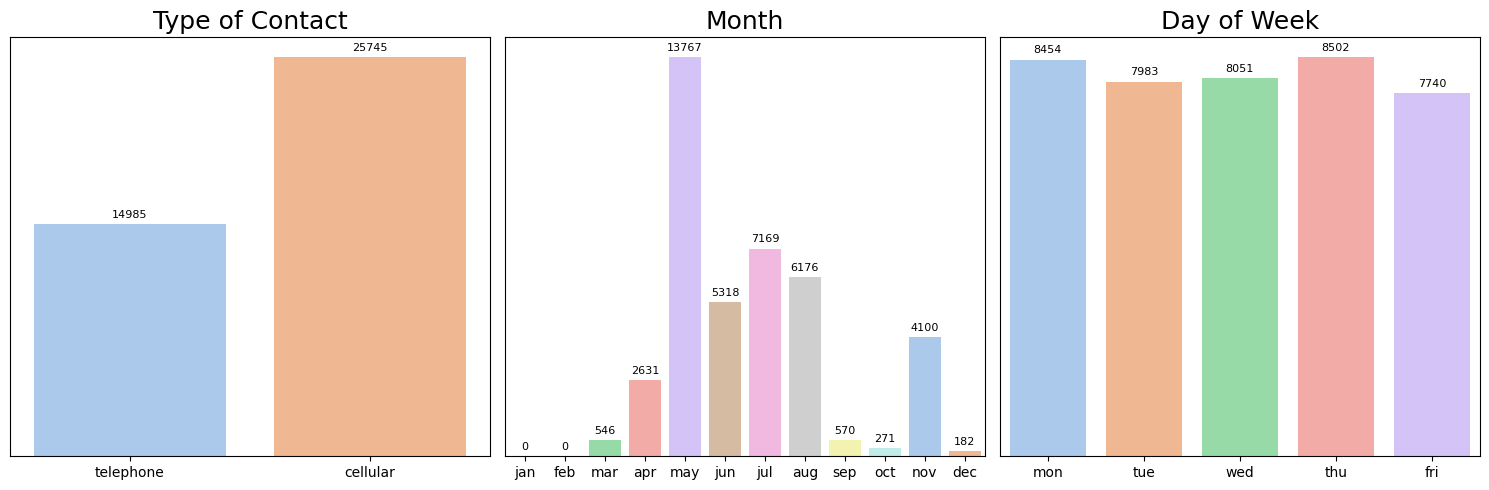

In [21]:
# Visualizing previous campaign categorical data 

# Add a common header for all histograms
plt.figure(figsize=(2, 1))
plt.text(0.5, 0.5, "Current Campaign Data", ha='center', va='center', fontsize=35)
plt.axis('off')  # Hide axis in the header plot

# Define the columns corresponding to the categorical variables for the last campaign contact
campaign_categorical_data_columns = ['contact', 'month', 'day_of_week']

# Create subplots to plot histograms for each categorical variable related to the last campaign contact
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Flatten the axs array for easier iteration
axs = axs.ravel()

# Loop through each categorical variable related to the last campaign contact and create the histogram
for i, categorical_var in enumerate(campaign_categorical_data_columns):
    sns.countplot(x=categorical_var, data=df, ax=axs[i], palette='pastel')
    if categorical_var == 'contact':
        axs[i].set_title("Type of Contact", fontsize=18)  # Rename title for 'contact'
    elif categorical_var == 'month':
        axs[i].set_title("Month", fontsize=18)  # Rename title for 'contact'
    elif categorical_var == 'day_of_week':
        axs[i].set_title("Day of Week", fontsize=18)  # Rename title for 'day_of_week'
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].set_yticks([])  # Remove y-axis labels

    # Set y-axis tick labels with the number of observations
    for p in axs[i].patches:
        height = p.get_height()
        axs[i].annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                        textcoords='offset points', ha='center', va='bottom', fontsize=8)  # Adjust fontsize

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plots
plt.show()

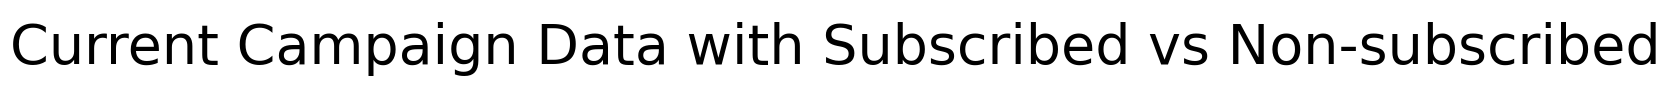

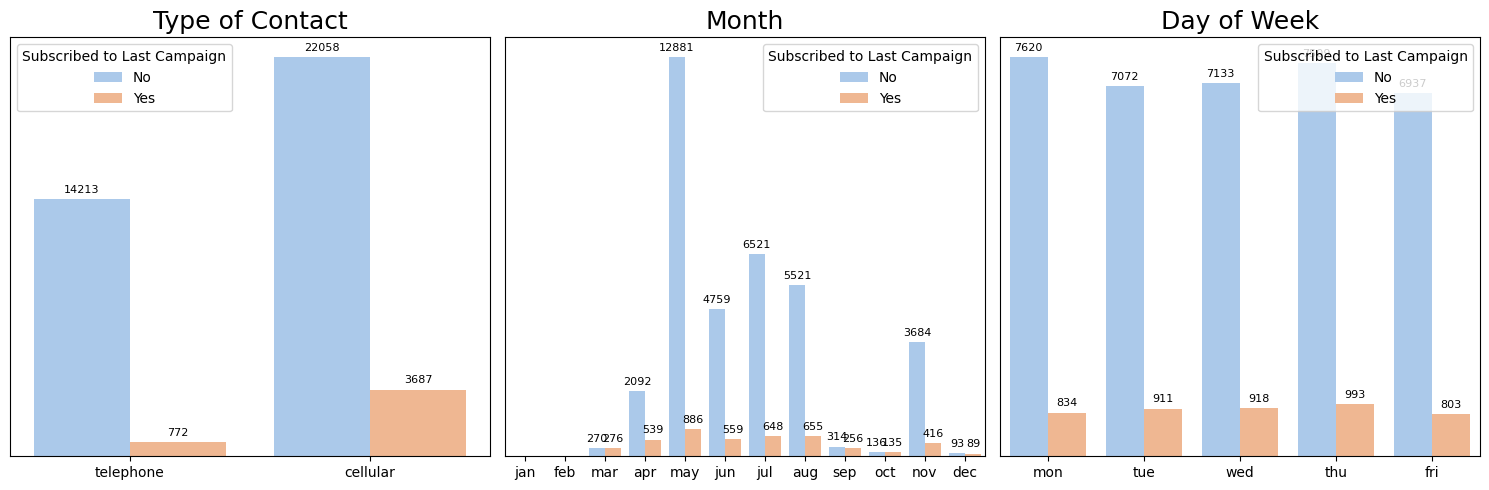

In [22]:
# Now taking into account subscribers vs non-subscribers

# Add a common header for all histograms
plt.figure(figsize=(2, 1))
plt.text(0.5, 0.5, "Current Campaign Data with Subscribed vs Non-subscribed", ha='center', va='center', fontsize=40)
plt.axis('off')  # Hide axis in the header plot

# Define the columns corresponding to the categorical variables for the last campaign contact
campaign_categorical_data_columns = ['contact', 'month', 'day_of_week']

# Create subplots to plot histograms for each categorical variable related to the last campaign contact
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Flatten the axs array for easier iteration
axs = axs.ravel()

# Loop through each categorical variable related to the last campaign contact and create the histogram
for i, categorical_var in enumerate(campaign_categorical_data_columns):
    sns.countplot(x=categorical_var, data=df, ax=axs[i], hue='subscribed', palette='pastel')
    if categorical_var == 'contact':
        axs[i].set_title("Type of Contact", fontsize=18)  # Rename title for 'contact'
    elif categorical_var == 'month':
        axs[i].set_title("Month", fontsize=18)  # Rename title for 'contact'
    elif categorical_var == 'day_of_week':
        axs[i].set_title("Day of Week", fontsize=18)  # Rename title for 'day_of_week'
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')
    axs[i].set_yticks([])  # Remove y-axis labels
    axs[i].legend(title="Subscribed to Last Campaign", labels=['No', 'Yes'])


    # Set y-axis tick labels with the number of observations for both subscribers and non-subscribers
    for p in axs[i].patches:
        height = p.get_height()
        if not pd.isna(height):
            axs[i].annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2, height), xytext=(0, 3),
                            textcoords='offset points', ha='center', va='bottom', fontsize=8)  # Adjust fontsize
            
# After the loop, use this line to set the correct order for the x-axis of the 'month' plot
axs[1].set_xticklabels(month_order)

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plots
plt.show()

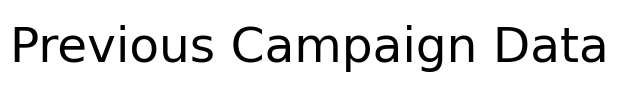

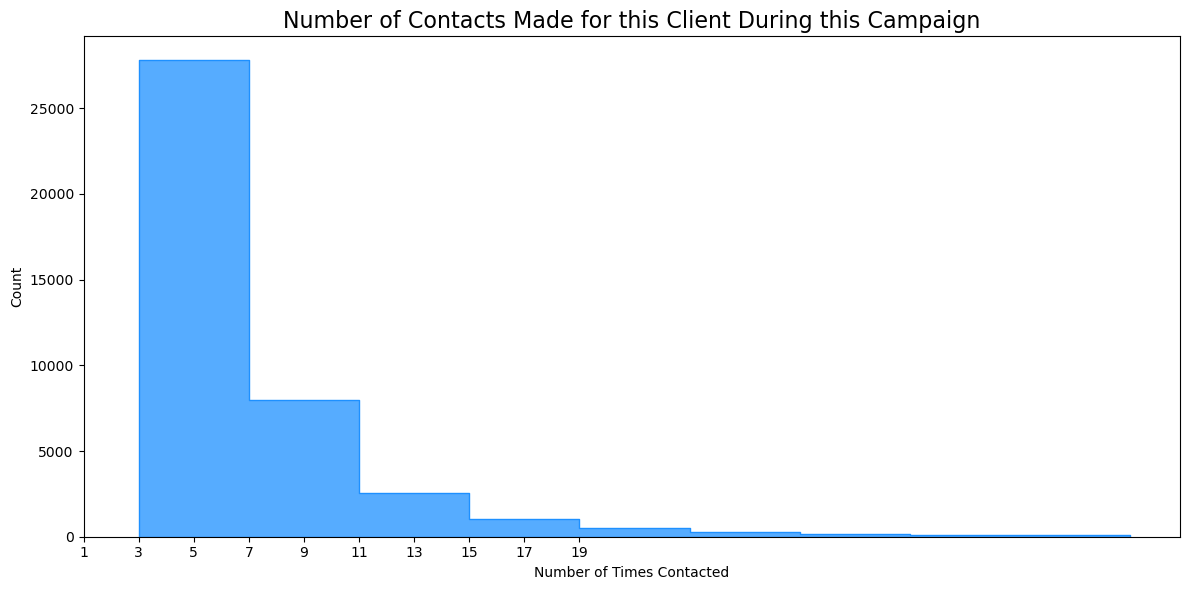

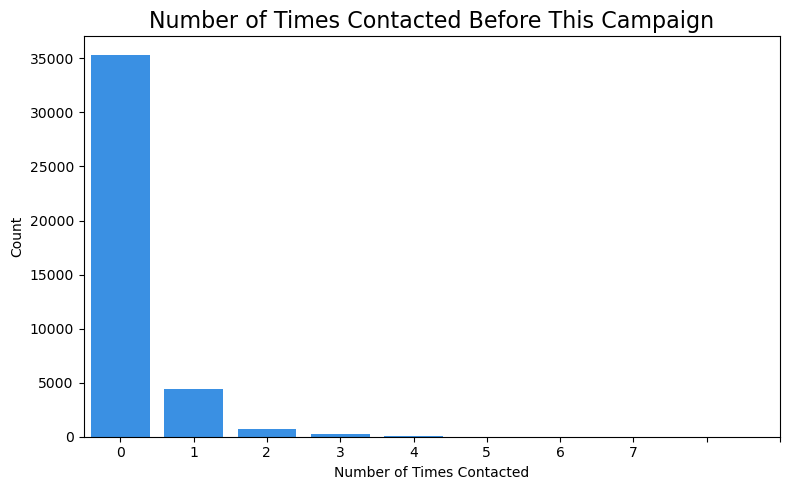

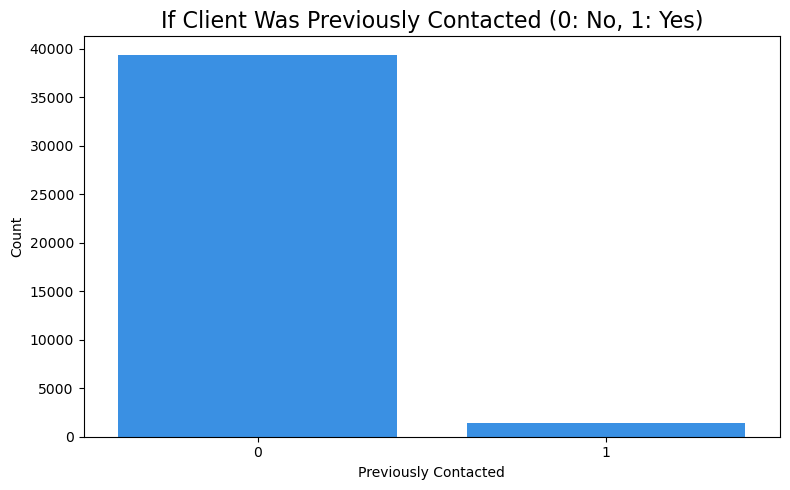

In [311]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a common header for all histograms
plt.figure(figsize=(2, 1))
plt.text(0.5, 0.5, "Previous Campaign Data", ha='center', va='center', fontsize=35)
plt.axis('off')  # Hide axis in the header plot

# Custom binning strategies for each variable
campaign_bins = list(range(1, 20, 2))  # Goes from 1 to 12 by 2

# Create histogram for campaign
plt.figure(figsize=(12, 6))  # Increase the figure size to better display the data
ax = sns.histplot(data=df, x='campaign', element='step', bins=campaign_bins, color='dodgerblue')
ax.set_title("Number of Contacts Made for this Client During this Campaign", fontsize=16)
ax.set_xlabel("Number of Times Contacted")
ax.set_ylabel("Count")

# Manually set x-axis tick positions and labels to align with bins
plt.xticks(ticks=range(len(campaign_bins)), labels=campaign_bins)

# Adjust the width of the bars for better visualization
width = 0.8
for bar in ax.patches:
    bar.set_x(bar.get_x() - width / 2)

plt.tight_layout()
plt.show()

# Create count plot for previous
plt.figure(figsize=(8, 5))
sns.countplot(x='previous', data=df, color='dodgerblue')
plt.title("Number of Times Contacted Before This Campaign", fontsize=16)
plt.xlabel("Number of Times Contacted")
plt.ylabel("Count")
plt.xticks(ticks=previous_bins)  # Specify the x-ticks to avoid overlapping
plt.tight_layout()
plt.show()

# Create count plot for prev_contacted
plt.figure(figsize=(8, 5))
sns.countplot(x='prev_contacted', data=df, color='dodgerblue')
plt.title("If Client Was Previously Contacted (0: No, 1: Yes)", fontsize=16)
plt.xlabel("Previously Contacted")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

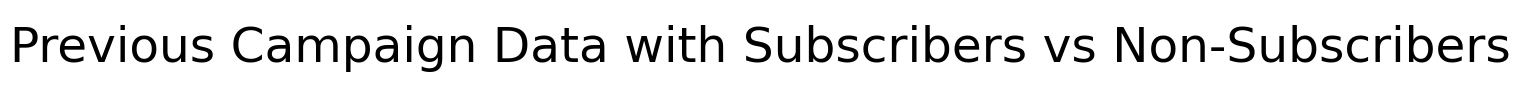

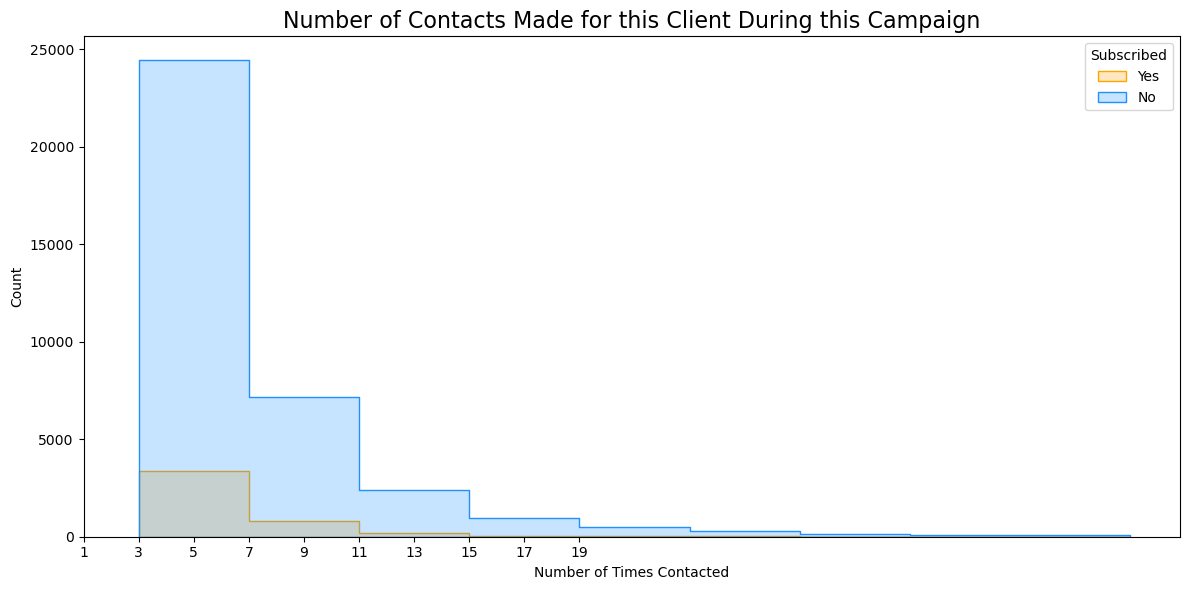

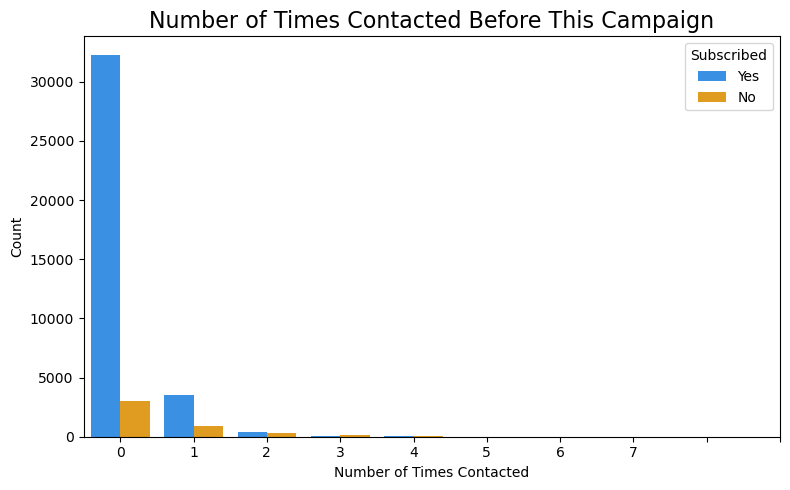

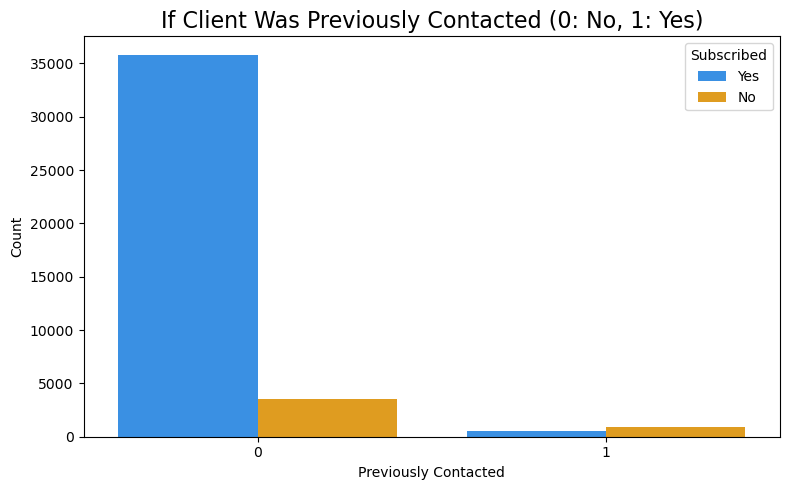

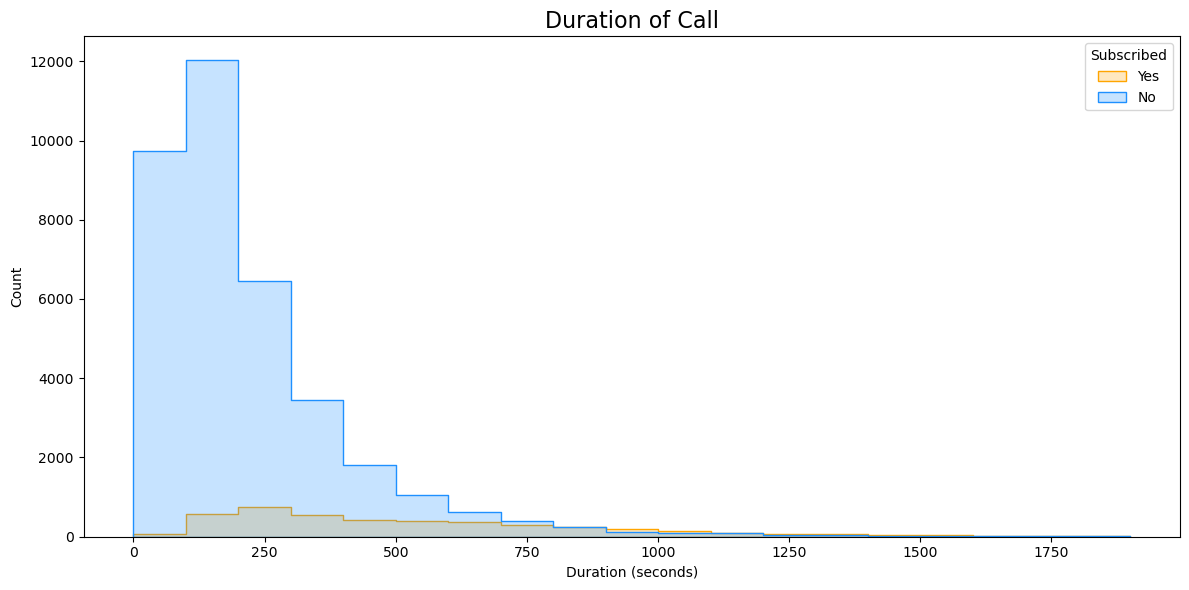

In [312]:
import seaborn as sns
import matplotlib.pyplot as plt

# Now accounting for subscribers vs non-subscribers

# Add a common header for all histograms
plt.figure(figsize=(2, 1))
plt.text(0.5, 0.5, "Previous Campaign Data with Subscribers vs Non-Subscribers", ha='center', va='center', fontsize=35)
plt.axis('off')  # Hide axis in the header plot

# Custom binning strategies for each variable
campaign_bins = list(range(1, 20, 2))  # Goes from 1 to 12 by 2
previous_bins = list(range(0, 10, 1))  # Goes from 0 to 9

# Create histogram for campaign
plt.figure(figsize=(12, 6))  # Increase the figure size to better display the data
ax = sns.histplot(data=df, x='campaign', hue='subscribed', element='step', bins=campaign_bins, palette=['dodgerblue', 'orange'])
ax.set_title("Number of Contacts Made for this Client During this Campaign", fontsize=16)
ax.set_xlabel("Number of Times Contacted")
ax.set_ylabel("Count")
ax.legend(title='Subscribed', labels=['Yes', 'No'])

# Manually set x-axis tick positions and labels to align with bins
plt.xticks(ticks=range(len(campaign_bins)), labels=campaign_bins)

# Adjust the width of the bars for better visualization
width = 0.8
for bar in ax.patches[len(campaign_bins):]:
    bar.set_x(bar.get_x() - width / 2)

plt.tight_layout()
plt.show()

# Create count plot for previous
plt.figure(figsize=(8, 5))
sns.countplot(x='previous', data=df, hue='subscribed', palette=['dodgerblue', 'orange'])
plt.title("Number of Times Contacted Before This Campaign", fontsize=16)
plt.xlabel("Number of Times Contacted")
plt.ylabel("Count")
plt.legend(title='Subscribed', labels=['Yes', 'No'])
plt.xticks(ticks=previous_bins)  # Specify the x-ticks to avoid overlapping
plt.tight_layout()
plt.show()

# Create count plot for prev_contacted
plt.figure(figsize=(8, 5))
sns.countplot(x='prev_contacted', data=df, hue='subscribed', palette=['dodgerblue', 'orange'])
plt.title("If Client Was Previously Contacted (0: No, 1: Yes)", fontsize=16)
plt.xlabel("Previously Contacted")
plt.ylabel("Count")
plt.legend(title='Subscribed', labels=['Yes', 'No'])
plt.tight_layout()
plt.show()

# Create histogram for duration
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='duration', hue='subscribed', element='step', bins=range(0, 2000, 100), palette=['dodgerblue', 'orange'])
plt.title("Duration of Call", fontsize=16)
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")
plt.legend(title='Subscribed', labels=['Yes', 'No'])
plt.tight_layout()
plt.show()

In [233]:
# Salesman might be able to make a benchmark for how long a call should last since it seems like the longer the call
# the more likely somebody will become a subscriber
# Create two separate data frames based on duration
df_duration_less_than_750 = df[df['duration'] <= 750]
df_duration_greater_than_750 = df[df['duration'] > 750]

# Calculate the percentage of subscribers for calls with duration less than or equal to 750 seconds
percentage_subscribers_less_than_750 = df_duration_less_than_750['subscribed'].mean() * 100

# Calculate the percentage of subscribers for calls with duration greater than 750 seconds
percentage_subscribers_greater_than_750 = df_duration_greater_than_750['subscribed'].mean() * 100

print("Percentage of subscribers for calls with duration less than or equal to 750 seconds:", percentage_subscribers_less_than_750)
print("Percentage of subscribers for calls with duration greater than 750 seconds:", percentage_subscribers_greater_than_750)

Percentage of subscribers for calls with duration less than or equal to 750 seconds: 8.627106378579551
Percentage of subscribers for calls with duration greater than 750 seconds: 55.00490677134445


In [235]:
# Salesman might be able to make a benchmark for how long a call should last since it seems like the longer the call
# the more likely somebody will become a subscriber
# Create two separate data frames based on duration
df_duration_less_than_250 = df[df['duration'] <= 250]
df_duration_greater_than_250 = df[df['duration'] > 250]

# Calculate the percentage of subscribers for calls with duration less than or equal to 750 seconds
percentage_subscribers_less_than_250 = df_duration_less_than_250['subscribed'].mean() * 100

# Calculate the percentage of subscribers for calls with duration greater than 750 seconds
percentage_subscribers_greater_than_250 = df_duration_greater_than_250['subscribed'].mean() * 100

print("Percentage of subscribers for calls with duration less than or equal to 250 seconds:", percentage_subscribers_less_than_250)
print("Percentage of subscribers for calls with duration greater than 250 seconds:", percentage_subscribers_greater_than_250)

Percentage of subscribers for calls with duration less than or equal to 250 seconds: 3.9347336834208555
Percentage of subscribers for calls with duration greater than 250 seconds: 24.235963041933193


In [73]:
# Find difference between subscribers and non-subscribers vs age, other columns etc.

# Calculate summary statistics for numerical variables
numerical_columns = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                     'euribor3m', 'nr.employed']
numerical_summary_subscribers = subscribers_data[numerical_columns].describe()
numerical_summary_non_subscribers = non_subscribers_data[numerical_columns].describe()

# Print summary statistics for subscribers
print("Summary Statistics for Subscribers:")
print(numerical_summary_subscribers)

# Print summary statistics for non-subscribers
print("\nSummary Statistics for Non-Subscribers:")
print(numerical_summary_non_subscribers)

Summary Statistics for Subscribers:
               age     campaign     previous  emp.var.rate  cons.price.idx  \
count  4459.000000  4459.000000  4459.000000   4459.000000     4459.000000   
mean     40.768782     2.073783     0.489347     -1.145616       93.391860   
std      13.647493     1.688688     0.866381      1.595408        0.663648   
min      17.000000     1.000000     0.000000     -3.400000       92.201000   
25%      31.000000     1.000000     0.000000     -1.800000       92.893000   
50%      37.000000     2.000000     0.000000     -1.800000       93.200000   
75%      49.000000     2.000000     1.000000     -0.100000       93.994000   
max      92.000000    23.000000     6.000000      1.400000       94.767000   

       cons.conf.idx    euribor3m  nr.employed  
count    4459.000000  4459.000000  4459.000000  
mean      -40.311505     2.179453  5098.253420  
std         5.677735     1.754590    87.904326  
min       -50.800000     0.634000  4963.600000  
25%       -46.20

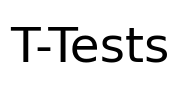


Hypothesis Testing for 'age'
T-statistic: 4.30
P-value: 0.0000
Result: There is a significant difference between subscribers and non-subscribers.

Hypothesis Testing for 'campaign'
T-statistic: -19.26
P-value: 0.0000
Result: There is a significant difference between subscribers and non-subscribers.

Hypothesis Testing for 'previous'
T-statistic: 27.33
P-value: 0.0000
Result: There is a significant difference between subscribers and non-subscribers.

Hypothesis Testing for 'emp.var.rate'
T-statistic: -56.66
P-value: 0.0000
Result: There is a significant difference between subscribers and non-subscribers.

Hypothesis Testing for 'cons.price.idx'
T-statistic: -21.30
P-value: 0.0000
Result: There is a significant difference between subscribers and non-subscribers.

Hypothesis Testing for 'cons.conf.idx'
T-statistic: 4.35
P-value: 0.0000
Result: There is a significant difference between subscribers and non-subscribers.

Hypothesis Testing for 'euribor3m'
T-statistic: -59.90
P-value: 0.0000

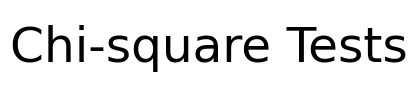


Hypothesis Testing for 'job'
Chi-square: 885.35
P-value: 0.0000
Result: There is a significant association between subscribers and non-subscribers.

Hypothesis Testing for 'marital'
Chi-square: 119.17
P-value: 0.0000
Result: There is a significant association between subscribers and non-subscribers.

Hypothesis Testing for 'education'
Chi-square: 187.82
P-value: 0.0000
Result: There is a significant association between subscribers and non-subscribers.

Hypothesis Testing for 'default'
Chi-square: 387.61
P-value: 0.0000
Result: There is a significant association between subscribers and non-subscribers.

Hypothesis Testing for 'housing'
Chi-square: 6.51
P-value: 0.0387
Result: There is a significant association between subscribers and non-subscribers.

Hypothesis Testing for 'loan'
Chi-square: 0.65
P-value: 0.7209
Result: There is no significant association between subscribers and non-subscribers.

Hypothesis Testing for 'contact'
Chi-square: 815.92
P-value: 0.0000
Result: There is a si

In [74]:
# Find difference between subscribers and non-subscribers vs age, other columns etc.
# using chi-squared and t-testtest
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

# List of categorical variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'prev_contacted']

# Add a common header for t-tests
plt.figure(figsize=(2, 1))
plt.text(0.5, 0.5, "T-Tests",
         ha='center', va='center', fontsize=35)
plt.axis('off')  # Hide axis in the header plot
plt.show()

# Perform hypothesis testing for numerical variables (t-test)
for numerical_column in numerical_columns:
    t_stat, p_value = ttest_ind(subscribers_data[numerical_column], non_subscribers_data[numerical_column], equal_var=False)
    print(f"\nHypothesis Testing for '{numerical_column}'")
    print(f"T-statistic: {t_stat:.2f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Result: There is a significant difference between subscribers and non-subscribers.")
    else:
        print("Result: There is no significant difference between subscribers and non-subscribers.")

# Add a common header for chi-square tests
plt.figure(figsize=(2, 1))
plt.text(0.5, 0.5, "Chi-square Tests",
         ha='center', va='center', fontsize=35)
plt.axis('off')  # Hide axis in the header plot
plt.show()

# Perform hypothesis testing for categorical variables (chi-square test)
for categorical_column in categorical_columns:
    contingency_table = pd.crosstab(df['subscribed'], df[categorical_column])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"\nHypothesis Testing for '{categorical_column}'")
    print(f"Chi-square: {chi2:.2f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Result: There is a significant association between subscribers and non-subscribers.")
    else:
        print("Result: There is no significant association between subscribers and non-subscribers.")

## Modeling: 

### Logistic Regression

In [306]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

# logistic regression with all variables

# Assuming the 'subscribed' column is encoded as strings ('yes' and 'no')
# Convert it to binary numeric values (1 and 0)
label_encoder = LabelEncoder()
df['subscribed'] = label_encoder.fit_transform(df['subscribed'])

# Convert 'prev_contacted' to binary numeric values (1 and 0)
df['prev_contacted'] = label_encoder.fit_transform(df['prev_contacted'])

# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'contact', 'day_of_week', 'poutcome', 'housing', 'loan', 'default', 'month']

# Use get dummies function to format categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Split the data into predictors (X) and target variable (y)
X = df_encoded.drop('subscribed', axis=1)
y = df_encoded['subscribed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

# Train the logistic regression model (now called DT_All_Var)
LogReg_All_Var = LogisticRegression(max_iter = 5000)
LogReg_All_Var.fit(X_train, y_train)

# Evaluate the model
# Predictions on the test set
y_pred = LogReg_All_Var.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate R-squared for training and test sets (optional)
r2_train = r2_score(y_train, LogReg_All_Var.predict(X_train))
r2_test = r2_score(y_test, y_pred)

print("R2 score (Training):", r2_train)
print("R2 score (Test):", r2_test)

# Calculate MAE for training and test sets (optional)
mae_train = mean_absolute_error(y_train, LogReg_All_Var.predict(X_train))
mae_test = mean_absolute_error(y_test, y_pred)

print("MAE (Training):", mae_train)
print("MAE (Test):", mae_test)

Accuracy: 0.9121041001718635
Precision: 0.6515486725663717
Recall: 0.43694362017804156
F1-score: 0.5230905861456484
R2 score (Training): 0.12178814316484288
R2 score (Test): 0.10446913589008622
MAE (Training): 0.08537055873171759
MAE (Test): 0.0878958998281365


In [211]:
# Get the coefficients and intercept
coefficients = LogReg_All_Var.coef_
intercept = LogReg_All_Var.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[-1.21070645e-05  4.84176559e-03 -1.83144156e-02 -1.57248210e-01
  -3.43485376e-01  3.92522246e-01  2.34598080e-02 -9.47091116e-02
  -7.65823288e-03  7.71011326e-01 -2.20985016e-01 -5.23078589e-02
  -2.52512040e-02  6.88658006e-03  1.91748208e-01 -5.13582104e-02
  -9.90570292e-02  9.55929000e-02  1.48665035e-02  2.95497870e-02
  -6.26081316e-03  1.90290961e-02  4.19918127e-02  8.08691415e-03
  -3.05276256e-02 -1.10055197e-01  9.78665409e-03  6.75473886e-03
   7.10547169e-02  7.96602185e-02  6.36850588e-02 -2.95105679e-01
  -1.40557283e-01 -1.07230982e-02  9.44977369e-02  1.36575182e-01
   2.44874444e-01  7.75381333e-01 -4.71562313e-02 -3.97134447e-03
  -4.71562313e-02 -3.36301701e-02 -3.35305746e-01 -2.75190755e-04
   1.91039811e-01  1.31158187e-02  2.18562519e-01  1.99433877e-01
   5.53290812e-01 -9.07365681e-01 -2.54398522e-01  1.66116032e-01
  -1.03672819e-01]]
Intercept: [0.00330626]


In [359]:
# best logistic regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

# Assuming the 'subscribed' column is encoded as strings ('yes' and 'no')
# Convert it to binary numeric values (1 and 0)
label_encoder = LabelEncoder()
df['subscribed'] = label_encoder.fit_transform(df['subscribed'])

# Convert 'prev_contacted' to binary numeric values (1 and 0)
df['prev_contacted'] = label_encoder.fit_transform(df['prev_contacted'])

# Create a new DataFrame with selected columns
df_selected = df[['previous', 'emp.var.rate', 'euribor3m', 'month', 'job', 'education', 'marital', 'prev_contacted', 'subscribed', 'contact', 'default', 'poutcome', 'campaign']].copy()

# Convert categorical columns to 'object' type
categorical_columns = ['month', 'job', 'education', 'marital', 'contact', 'default', 'poutcome']
df_selected[categorical_columns] = df_selected[categorical_columns].astype('object')

# Perform dummy encoding for selected categorical columns
df_encoded = pd.get_dummies(df_selected, columns=categorical_columns, drop_first=True)

# Split the data into predictors (X) and target variable (y)
X = df_encoded.drop('subscribed', axis=1)
y = df_encoded['subscribed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

# Train the logistic regression model (now called LogReg_Var_Sub)
LogReg_Var_Sub = LogisticRegression(max_iter = 1000)
LogReg_Var_Sub.fit(X_train, y_train)

# Evaluate the model
# Predictions on the test set
y_pred = LogReg_Var_Sub.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate R-squared for training and test sets (optional)
r2_train = r2_score(y_train, LogReg_Var_Sub.predict(X_train))
r2_test = r2_score(y_test, y_pred)

print("R2 score (Training):", r2_train)
print("R2 score (Test):", r2_test)

# Calculate MAE for training and test sets (optional)
mae_train = mean_absolute_error(y_train, LogReg_Var_Sub.predict(X_train))
mae_test = mean_absolute_error(y_test, y_pred)

print("MAE (Training):", mae_train)
print("MAE (Test):", mae_test)

Accuracy: 0.9022833292413455
Precision: 0.6925
Recall: 0.20548961424332343
F1-score: 0.3169336384439359
R2 score (Training): -0.0066602631758785336
R2 score (Test): 0.004409821464397501
MAE (Training): 0.09785696748623339
MAE (Test): 0.09771667075865456


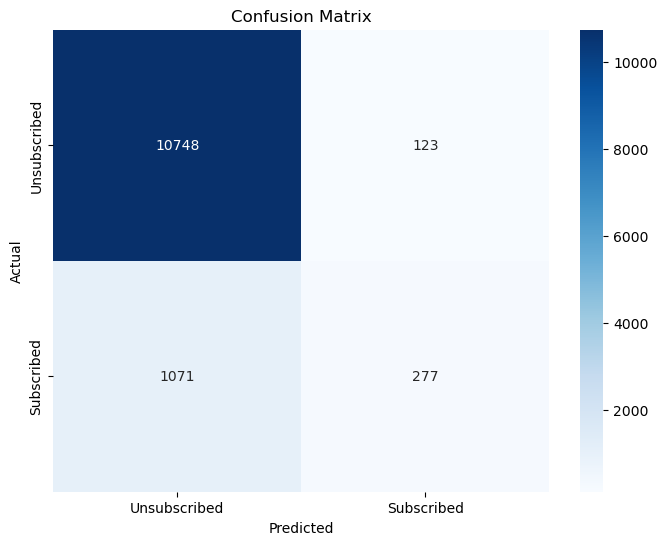

In [369]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Create a DataFrame for the confusion matrix with labeled rows and columns
cm_df = pd.DataFrame(cm, index=['Unsubscribed', 'Subscribed'], columns=['Unsubscribed', 'Subscribed'])

# Create a heatmap of the labeled confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [347]:
# Obtain the coefficients and intercept
coefficients = LogReg_Var_Sub.coef_
intercept = LogReg_Var_Sub.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[ 0.11173298 -0.06771078 -0.40293366  1.11838588 -0.05952599  0.25120265
   0.64629379  0.57352269  0.4073533   1.05030006 -0.5362737   0.04615861
   1.18950531  0.43684214 -0.29959295 -0.1885999  -0.20340495 -0.0366082
   0.2257343  -0.20232881 -0.22756228  0.15508581 -0.13622259  0.00461491
   0.06190454  0.17946207 -0.08161052 -0.02512508  0.56054463  0.05067231
   0.03421337  0.09855743  0.02659481  0.05845877 -0.71889611 -0.193749
  -0.29216859 -0.04216966  0.60412817  0.89140307]]
Intercept: [-1.3541917]


In [348]:
# Get the feature names after dummy encoding
feature_names = X_train.columns.tolist()

# Coefficients of the logistic regression model
coefficients = [-0.21800116, -0.01226225, -0.4611682, 1.83803369, 0.22390801, 0.70814169, 0.51007122, 0.34780165,
                1.0944628, -0.61933995, -0.00361434, 1.16824342, 0.51075784, -0.14588938, -0.07715781, -0.11598079,
                -0.00704909, 0.34600035, -0.03174209, -0.12458273, 0.22161886, -0.02495022, 0.00377458, -0.14742198,
                0.02296114, -0.09127741, 0.01258928, 0.65179727, 0.04428766, 0.07639927, 0.17941527, 0.02771171,
                0.05778523, 0.38314052, -0.12098284, -0.31440991, -0.09784676]

# Intercept of the logistic regression model
intercept = -0.79253198

# Create the logistic regression equation with only selected features
logistic_eqn = "Logit(p) = {:.4f}".format(intercept)

for feature_name, coefficient in zip(feature_names, coefficients):
    logistic_eqn += " + {:.4f} * {}".format(coefficient, feature_name)

print(logistic_eqn)

Logit(p) = -0.7925 + -0.2180 * previous + -0.0123 * emp.var.rate + -0.4612 * euribor3m + 1.8380 * prev_contacted + 0.2239 * campaign + 0.7081 * month_aug + 0.5101 * month_dec + 0.3478 * month_jul + 1.0945 * month_jun + -0.6193 * month_mar + -0.0036 * month_may + 1.1682 * month_nov + 0.5108 * month_oct + -0.1459 * month_sep + -0.0772 * job_blue-collar + -0.1160 * job_entrepreneur + -0.0070 * job_housemaid + 0.3460 * job_management + -0.0317 * job_retired + -0.1246 * job_self-employed + 0.2216 * job_services + -0.0250 * job_student + 0.0038 * job_technician + -0.1474 * job_unemployed + 0.0230 * job_unknown + -0.0913 * education_basic.6y + 0.0126 * education_basic.9y + 0.6518 * education_high.school + 0.0443 * education_illiterate + 0.0764 * education_professional.course + 0.1794 * education_university.degree + 0.0277 * education_unknown + 0.0578 * marital_married + 0.3831 * marital_single + -0.1210 * marital_unknown + -0.3144 * contact_telephone + -0.0978 * default_unknown


Coefficient: 1.8380
Interpretation: If the customer was previously contacted (prev_contacted = 1), the probability of them subscribing is approximately 86%.

Month Variables:

Coefficients:
month_aug (0.7081),
month_dec (0.5101),
month_jul (0.3478),
month_jun (1.0945),
month_mar (-0.6193),
month_may (-0.0036),
month_nov (1.1682),
month_oct (0.5108),
month_sep (-0.1459)

Interpretation: The coefficients represent how each month affects the probability of a customer subscribing. For example, if the month is June (month_jun = 1), the probability of subscribing is approximately 75%. 

Job Variables:

Coefficients:
job_blue-collar (-0.0772),
job_entrepreneur (-0.1160),
job_housemaid (-0.0070),
job_management (0.3460),
job_retired (-0.0317),
job_self-employed (-0.1246),
job_services (0.2216),
job_student (-0.0250),
job_technician (0.0038),
job_unemployed (-0.1474),
job_unknown (0.0230)

Interpretation: The coefficients show how each job category impacts the probability of subscribing. For example, compared to a blue-collar worker, the probability of a student (job_student = 1) subscribing is approximately 49%.

Education Variables:

Coefficients:
education_basic.6y (-0.0913),
education_basic.9y (0.0126),
education_high.school (0.6518),
education_illiterate (0.0443),
education_professional.course (0.0764),
education_university.degree (0.1794),
education_unknown (0.0277)

Interpretation: The coefficients represent how each education level influences the probability of subscribing. For example, compared to a customer with a basic 6-year education, the probability of a customer with a high school education (education_high.school = 1) subscribing is approximately 66%. 

Marital Status Variables:

Coefficients:
marital_married (0.0578),
marital_single (0.3831),
marital_unknown (-0.1210)

Interpretation: The coefficients indicate how each marital status affects the probability of subscribing. For example, compared to a married customer, the probability of a single customer (marital_single = 1) subscribing is approximately 59%.

Regarding the model evaluation metrics:

Accuracy: The model's overall accuracy in predicting whether a customer will subscribe or not is approximately 90.23%. It measures the proportion of correctly classified observations out of the total.

Precision: The precision score is 0.6925, which means that when the model predicts a customer will subscribe, it is correct about 69.25% of the time.

Recall (Sensitivity or True Positive Rate): The recall score is 0.2055, indicating that the model can correctly identify approximately 20.55% of the actual subscribing customers.

R-squared (R2) Score: The R2 score measures how well the model fits the data. In this case, the R2 scores for the training and test sets are close to zero, suggesting that the model does not provide a good fit to the data.

Overall, the logistic regression model provides insights into the factors influencing customer subscriptions and achieves a reasonably high accuracy. However, the model may not be the best fit for the data, as indicated by the low R2 score. The model was biased to have a higher precision rate than recall since a false positive such as mislabeling a non-subscriber as a potential subscriber could have a high cost to the marketing campaign and could waste a lot of money. 

### Decision Trees

In [371]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming the 'subscribed' column is encoded as strings ('yes' and 'no')
# Convert it to binary numeric values (1 and 0)
label_encoder = LabelEncoder()
df['subscribed'] = label_encoder.fit_transform(df['subscribed'])

# Create a new DataFrame with selected columns
df_selected = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
                  'duration', 'campaign', 'prev_contacted', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
                  'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed']].copy()

# Convert categorical columns to 'object' type if needed
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
df_selected.loc[:, categorical_columns] = df_selected[categorical_columns].astype('object')

# Perform dummy encoding for selected categorical columns
df_encoded = pd.get_dummies(df_selected, columns=categorical_columns, drop_first=True)

# Split the data into predictors (X) and target variable (y)
X = df_encoded.drop('subscribed', axis=1)
y = df_encoded['subscribed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8 )

# Train the Decision Tree model (now called DT_All_Var)
DT_All_Var = DecisionTreeClassifier(random_state = 8)
DT_All_Var.fit(X_train, y_train)

# Evaluate the model
# Predictions on the test set
y_pred = DT_All_Var.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate R-squared for training and test sets (optional)
y_train_pred = DT_All_Var.predict(X_train)
y_test_pred = DT_All_Var.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate Mean Absolute Error (MAE) for training and test sets (optional)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("R2 score (Training):", r2_train)
print("R2 score (Test):", r2_test)
print("MAE (Training):", mae_train)
print("MAE (Test):", mae_test)

Accuracy: 0.8895981667894263
Precision: 0.4996505939902166
Recall: 0.5304154302670623
F1-score: 0.5145735876214466
R2 score (Training): 1.0
R2 score (Test): -0.12483345966878368
MAE (Training): 0.0
MAE (Test): 0.1104018332105737


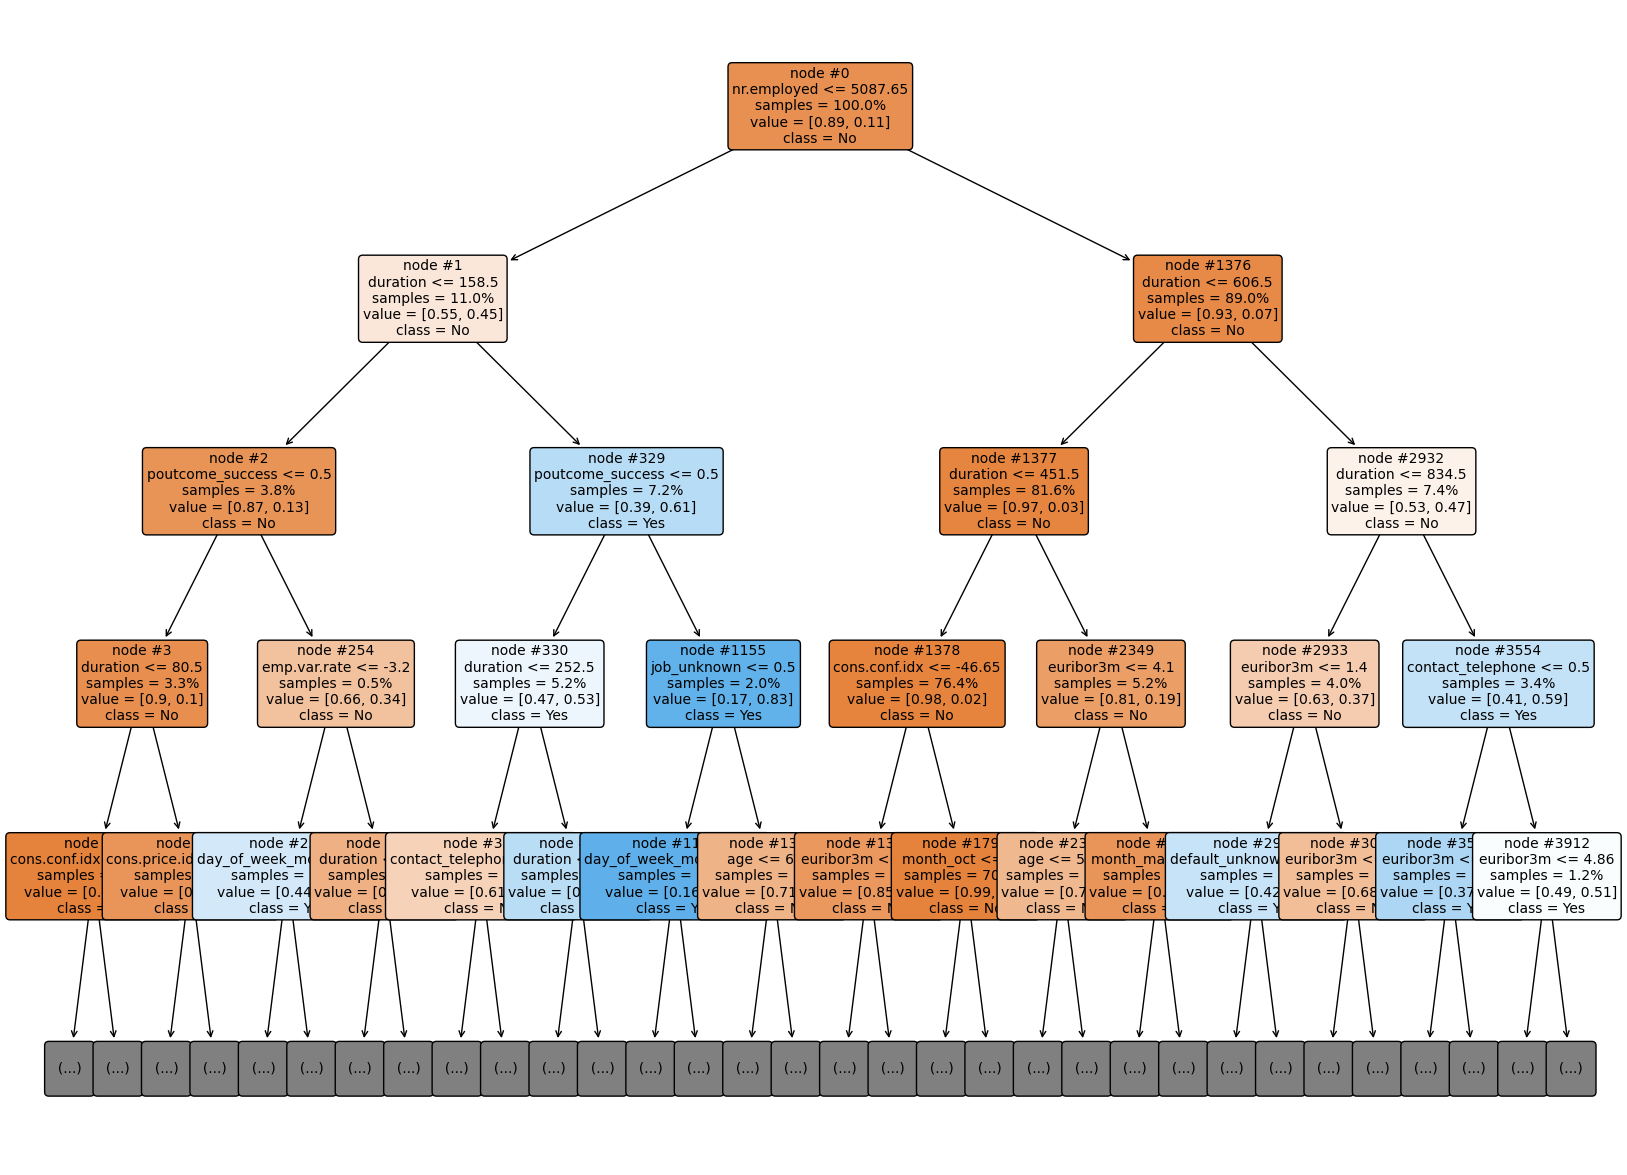

In [372]:
# Plot the Decision Tree and save it to a file
plt.figure(figsize=(20, 15))  # Adjust the figure size as needed
plot_tree(
    DT_All_Var,
    filled=True,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    fontsize=10,
    node_ids=True,              # Display the node IDs
    proportion=True,            # Show the proportion of samples in each node
    impurity=False,             # Do not show the impurity (gini) at each node
    rounded=True,               # Make the decision boxes with rounded corners
    precision=2,                # Set precision for displaying values
    max_depth=4,
)
plt.show()

In [394]:
# Select the subset of columns from the original DataFrame
subset_columns = ['subscribed', 'poutcome', 'cons.price.idx', 'contact']
df_subset = df[subset_columns].copy()  # Make a copy of the DataFrame to avoid warnings

# Convert 'subscribed' column to binary numeric values (1 and 0)
df_subset['subscribed'] = label_encoder.fit_transform(df_subset['subscribed'])

# Perform dummy encoding for selected categorical columns
categorical_columns = ['poutcome', 'contact']
df_subset = pd.get_dummies(df_subset, columns=categorical_columns, drop_first=True)

# Split the data into predictors (X) and target variable (y)
X_subset = df_subset.drop('subscribed', axis=1)
y_subset = df_subset['subscribed']

# Split the data into training and testing sets
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y_subset, test_size = 0.3, random_state = 8)

# Train the Decision Tree model (now called DT_Subset_Var)
DT_Subset_Var = DecisionTreeClassifier(random_state=8)
DT_Subset_Var.fit(X_train_subset, y_train_subset)

# Evaluate the model
# Predictions on the test set
y_pred_subset = DT_Subset_Var.predict(X_test_subset)

# Calculate evaluation metrics
accuracy_subset = accuracy_score(y_test_subset, y_pred_subset)
precision_subset = precision_score(y_test_subset, y_pred_subset)
recall_subset = recall_score(y_test_subset, y_pred_subset)
f1_subset = f1_score(y_test_subset, y_pred_subset)

print("Accuracy (Subset):", accuracy_subset)
print("Precision (Subset):", precision_subset)
print("Recall (Subset):", recall_subset)
print("F1-score (Subset):", f1_subset)

Accuracy (Subset): 0.9018741304525738
Precision (Subset): 0.6469428007889546
Recall (Subset): 0.2433234421364985
F1-score (Subset): 0.3536388140161725


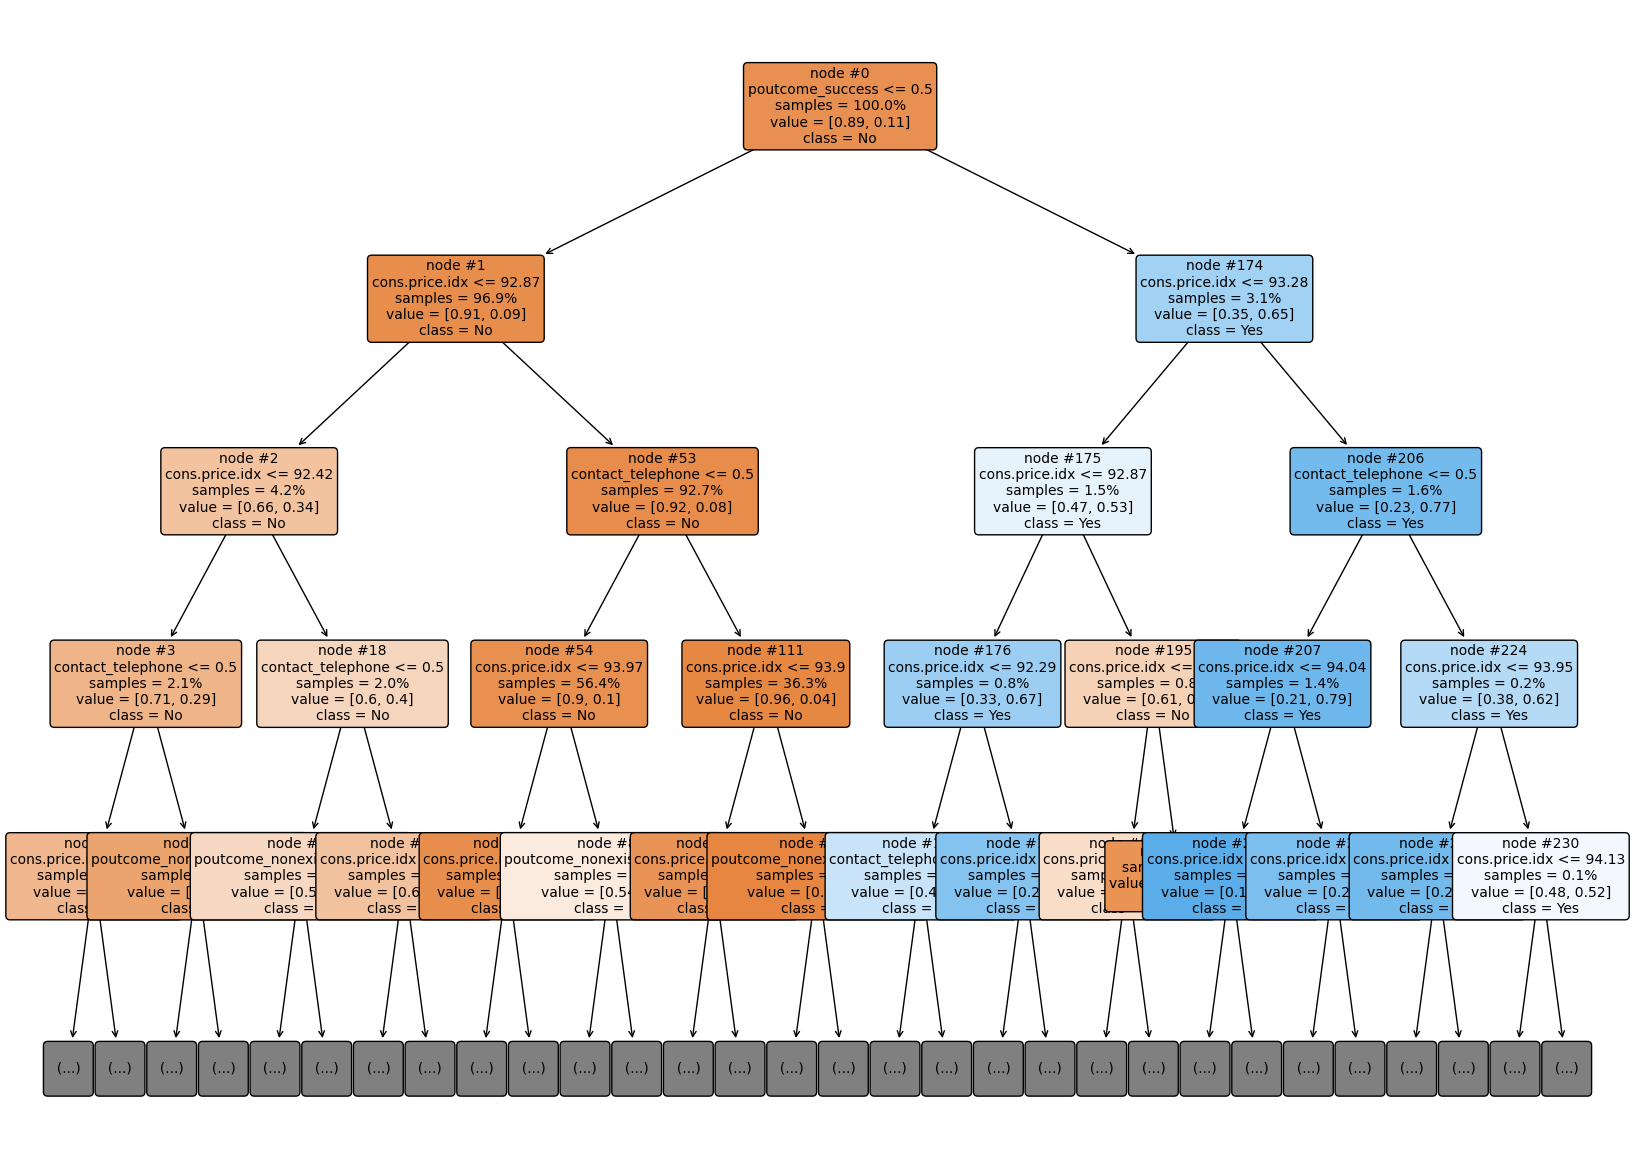

In [374]:
# Plot the Decision Tree for the subset and save it to a file
plt.figure(figsize=(20, 15))  # Adjust the figure size as needed
plot_tree(
    DT_Subset_Var,
    filled=True,
    feature_names=X_subset.columns,
    class_names=['No', 'Yes'],
    fontsize=10,
    node_ids=True,              # Display the node IDs
    proportion=True,            # Show the proportion of samples in each node
    impurity=False,             # Do not show the impurity (gini) at each node
    rounded=True,               # Make the decision boxes with rounded corners
    precision=2,                # Set precision for displaying values
    max_depth=4,                # Limit the depth of the tree for better visualization
)
plt.show()

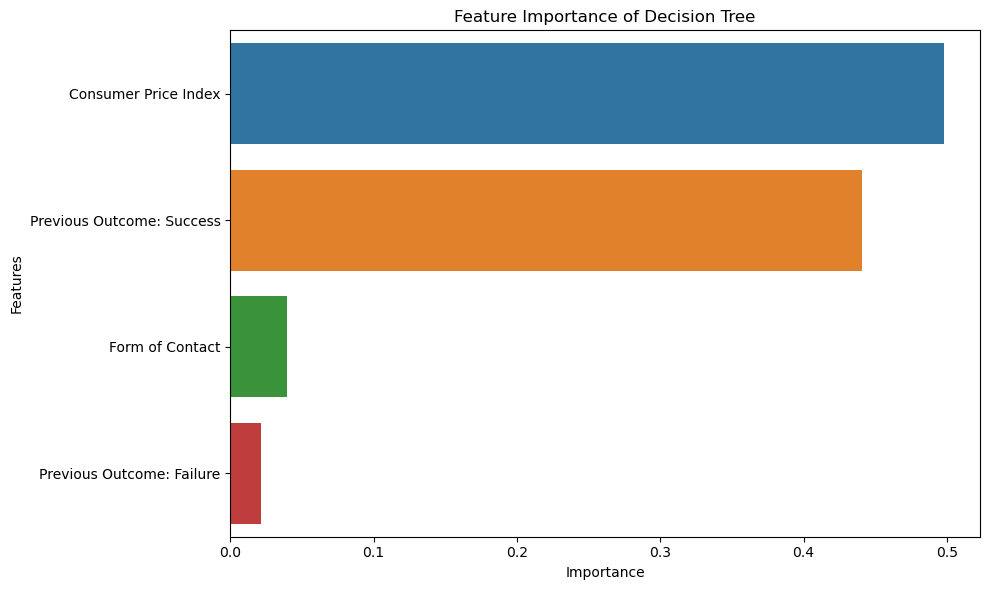

In [386]:
# Match the feature importances to the column names
feature_importance_df = pd.DataFrame({'Feature': X_subset.columns, 'Importance': feature_importance})

# Create a dictionary to map original column names to desired labels
label_mapping = {
    'cons.price.idx': 'Consumer Price Index',
    'poutcome_success': 'Previous Outcome: Success',
    'contact_telephone': 'Form of Contact',
    'poutcome_nonexistent': 'Previous Outcome: Failure'
}

# Replace the column names with the desired labels
feature_importance_df['Feature'] = feature_importance_df['Feature'].replace(label_mapping)

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, orient='h')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance of Decision Tree')
plt.tight_layout()
plt.show()

In [392]:
# Print the feature importance values
print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                     Feature  Importance
0       Consumer Price Index    0.498168
2  Previous Outcome: Success    0.440650
3            Form of Contact    0.039442
1  Previous Outcome: Failure    0.021740


Consumer Price Index (CPI) is the most important feature in predicting customer subscription, with an importance score of approximately 0.498. This suggests that changes in the CPI have a significant impact on the likelihood of a customer subscribing to the service.

Previous Outcome: Success is the second most important feature, with an importance score of about 0.441. This indicates that if a customer had a successful outcome in a previous marketing campaign, they are more likely to subscribe in the current campaign.

Form of Contact has a relatively low importance score of around 0.039. It suggests that the method of contact used to reach customers has a minor influence on their subscription decision.

Previous Outcome: Failure has the lowest importance score of approximately 0.022. This implies that if a customer had a failed outcome in a previous marketing campaign, it has a limited impact on their likelihood of subscribing in the current campaign.

Overall, the decision tree model achieved a reasonable accuracy of approximately 90.19% on the subset of features used for training and testing. In the decision tree model there is more of a balance between precision and recall rate than the logistic regression. The precision score, which measures the model's ability to correctly identify subscribing customers when it predicts subscription, is approximately 64.69%. The recall score, which represents the model's ability to correctly identify actual subscribing customers, is around 24.33%. The F1-score, which is the harmonic mean of precision and recall, is approximately 0.354.

In summary, the model suggests that the Consumer Price Index and the outcome of previous marketing campaigns play crucial roles in predicting customer subscriptions. However, there is still room for improvement, as the model's recall rate is relatively low.